In [5]:
import pandas as pd
df= pd.read_csv("NEW_Keywords_parent.csv")
df

,index,selftext,num_comments,score,title,type
0,14,Attention all parents and kids!I need your hel...,0,2,Learning to become an Adult,Adult
1,30,So for years I've had issues with my parents t...,1,1,19 year old trying to gain my independence,Adult
2,42,If it hit rock bottom I'm okay with sugar moms...,7,1,"I need help when I'm eighteen (""running away"")",Adult
3,50,Do you resent your parents for asking you to p...,8,1,Adulting Early and Ill-perpared,Adult
4,55,I saw a post on Facebook the other day explain...,1,5,Failure at Adulting,Adult
...,...,...,...,...,...,...
3877,5985,"I just feel bad, I'm 21 and my parents did a l...",0,1,"It's not a pity party, it's suicide",Adult
3878,5993,"(im rounding prices, cause im from another cou...",7,1,how much should I spend on a new phone?,Adult
3879,5999,"I'm a well educated person, speaking four lang...",0,1,Should I change my job? I feel like burning ou...,Adult
3880,6010,I just told my parents where I was going and w...,21,1,Do I need to ask permision from my parents to ...,Adult


# Clean text

In [6]:
import re
def remove_other(x):
    x = re.sub("\$"," ", x) #remove $
    x = re.sub("https*\S+", " ", x) #remove url
    #x = re.sub("\'\w+", '', x) #remove i'm,we're,let's after the '
    #x = re.sub("[0-9]+", '', x) #remove numbers
    x = x.encode('ascii', 'ignore').decode()
    return x

In [7]:
from nltk.stem import WordNetLemmatizer
def lemmatize(words):
    lemmatizer = WordNetLemmatizer()
    nwords=[]
    for word in words:
        word=lemmatizer.lemmatize(word)
        nwords.append(word)
    return ' '.join(nwords)

In [8]:
df['selftext']=df['selftext'].apply(lambda x: remove_other(x))
df['selftext']= df['selftext'].str.split().apply(lambda x: lemmatize(x))
df['selftext']

0       Attention all parent and kids!I need your help...
1       So for year I've had issue with my parent taki...
2       If it hit rock bottom I'm okay with sugar mom ...
3       Do you resent your parent for asking you to pa...
4       I saw a post on Facebook the other day explain...
                              ...                        
3877    I just feel bad, I'm 21 and my parent did a lo...
3878    (im rounding prices, cause im from another cou...
3879    I'm a well educated person, speaking four lang...
3880    I just told my parent where I wa going and wit...
3881    My brother is doing a victory dance because he...
Name: selftext, Length: 3882, dtype: object

In [9]:
X=pd.DataFrame({'text':df['selftext']})
X = X.dropna().reset_index()
X

,index,text
0,0,Attention all parent and kids!I need your help...
1,1,So for year I've had issue with my parent taki...
2,2,If it hit rock bottom I'm okay with sugar mom ...
3,3,Do you resent your parent for asking you to pa...
4,4,I saw a post on Facebook the other day explain...
...,...,...
3877,3877,"I just feel bad, I'm 21 and my parent did a lo..."
3878,3878,"(im rounding prices, cause im from another cou..."
3879,3879,"I'm a well educated person, speaking four lang..."
3880,3880,I just told my parent where I wa going and wit...


# Topic Modeling

In [10]:
from sklearn.feature_extraction.text import TfidfVectorizer
vec=TfidfVectorizer(min_df=0.01,stop_words='english',ngram_range=(1,2))
counts=vec.fit_transform(X['text'])
counts=counts.toarray()
count_df1=pd.DataFrame(counts,columns=vec.get_feature_names())
count_df1=count_df1.drop(['amp','don'],axis=1)
count_df1

,000,10,100,15,18,19,20,2020,22,23,...,wont,work,working,wrong,x200b,year,year ago,year old,years,young
0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.000000,0.00000,0.0,0.000000,0.000000,0.0,0.0,0.0
1,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.000000,0.00000,0.0,0.101083,0.000000,0.0,0.0,0.0
2,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.048741,0.000000,0.00000,0.0,0.036201,0.064452,0.0,0.0,0.0
3,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.000000,0.00000,0.0,0.000000,0.000000,0.0,0.0,0.0
4,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.000000,0.00000,0.0,0.000000,0.000000,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3877,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.000000,0.00000,0.0,0.000000,0.000000,0.0,0.0,0.0
3878,0.0,0.0,0.243699,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.000000,0.00000,0.0,0.000000,0.000000,0.0,0.0,0.0
3879,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.340007,0.00000,0.0,0.427792,0.000000,0.0,0.0,0.0
3880,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.000000,0.00000,0.0,0.000000,0.000000,0.0,0.0,0.0


In [26]:
from sklearn.decomposition import NMF

model1=NMF(n_components=3,init="random",random_state=0)
model1.fit(count_df1)
#model1.components_

NMF(init='random', n_components=3, random_state=0)

In [27]:
import numpy as np
def top_words(X, model, component, num_words):
    """
    Extract the top words from the specified component 
    for a topic model trained on data. 
    X: a term-document matrix, assumed to be a pd.DataFrame
    model: a sklearn model with a components_ attribute, e.g. NMF
    component: the desired component, specified as an integer. 
        Must be less than than the total number of components in model
    num_words: the number of words to return.
    """
    orders = np.argsort(model.components_, axis = 1)
    important_words = np.array(X.columns)[orders]
    return important_words[component][-num_words:]

In [28]:
topic1=pd.DataFrame({'Topic 0':top_words(count_df1, model1, 0, 10),
                   'Topic 1':top_words(count_df1, model1, 1, 10),
                   'Topic 2':top_words(count_df1, model1, 2, 10),})
topic1

,Topic 0,Topic 1,Topic 2
0,time,people,currently live
1,wa,bank,rent
2,just,got,live parent
3,want,company,living parents
4,like,credit,currently
5,im,just,home
6,money,ha,living
7,house,account,live parents
8,year,wa,live
9,parent,apparently,parents


Topic 0: money/house/time \
Topic 1: bank/company/credit \
Topic 2: live with parents 

In [29]:
#assign each observations to the 3 topics
W=model1.fit_transform(count_df1)
L=[]
for i in W:
    L.append(i.argmax())
X['topic']=L
t0=X[X.topic==0]
t1=X[X.topic==1]
t2=X[X.topic==2]

## Compare Emotion across topics

In [30]:
def sent_df(df):
    from nltk.sentiment.vader import SentimentIntensityAnalyzer as SIA
    import my_module
    import importlib
    importlib.reload(my_module)

    #create a list of dictionaries
    sia = SIA()
    results = []
    words=[]

    for line in df['text']:
        D,pol_score=my_module.polarity_scores(sia,text=line) #use customized module
        pol_score['text'] = line
        results.append(pol_score)
        words.append(D)
    #Extract sentiment words
    D_p=[] # positive word and its sentiment score
    D_n=[] # negative word and its sentiment score
    D1=[] # only positive word
    D2=[] # only negative word
    for i in range(len(words)):
        newDict = {key: value for (key, value) in words[i].items() if value != 0.0 }
        newDict1 = {key: value for (key, value) in words[i].items() if value > 0.0 }
        newDict2 = {key: value for (key, value) in words[i].items() if value < 0.0 }
        D_p.append(newDict1)
        D_n.append(newDict2)
        D1.append(list(newDict1.keys()))
        D2.append(list(newDict2.keys()))
    #create a df to write in the results of sentiment analysis
    sent = pd.DataFrame(results)
    sent['p_word_dict']=D_p
    sent['n_word_dict']=D_n
    p=[]
    n=[]
    for i in D1:
        p.append(' '.join(i))
    for i in D2:
        n.append(' '.join(i))
    sent['total']=(sent.pos-sent.neg)/sent.neu    
    sent['p_word']=p
    sent['n_word']=n
    sent['label']=0
    sent['label'].loc[sent['total']> 0]=1
    sent['label'].loc[sent['total']< 0]=-1
    return sent

In [31]:
a=sent_df(t0)
a['topic']=0

b=sent_df(t1)
b['topic']=1

c=sent_df(t2)
c['topic']=2


/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [32]:
final=pd.concat([a,b,c],axis=0)
final.total.describe()

count    3881.000000
mean        0.040141
std         0.170890
min        -1.012072
25%        -0.016588
50%         0.007503
75%         0.116550
max         1.398082
Name: total, dtype: float64

[Text(0, 0.5, 'Sentiment Score'), Text(0.5, 1.0, 'Sentiment Score by topics')]

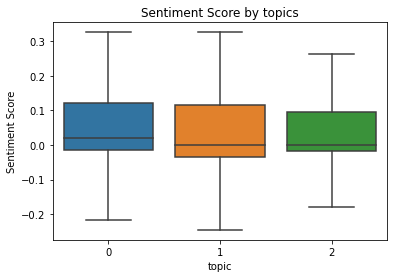

In [38]:
import seaborn as sns
ax = sns.boxplot(x="topic", y="total", data=final,showfliers = False)
ax.set(ylabel="Sentiment Score",title="Sentiment Score by topics")

## Word Frequency splitted by sentiment

In [46]:
from nltk.corpus import stopwords
#nltk.download("stopwords") #uncomment it when run it for the first time
stop_words = set(stopwords.words("english"))

stop_words.update({'would','k','im','could','also',
                   'amp','much','one','like','get',
                   'since','etc','got','always',
                   'know','thing','really','dont',
                   'find','even','go','time','need','want'
                  })
def remove_stopwords(text):
    text = " ".join([word for word in text.split() if word not in stop_words])
    return text

final['text']=final['text'].apply(lambda x: remove_stopwords(x))

In [47]:
from nltk.util import ngrams
def count_2gram(text):
    all_words = list(itertools.chain(*text.str.split()))
    es2grams = ngrams(all_words, 2)
    counts = collections.Counter(es2grams)
    count_df = pd.DataFrame(counts.most_common(100),
                            columns=['words', 'count'])
    dictionary2 = [' '.join(tup) for tup in count_df.words]
    count_df.words=dictionary2

    return count_df

In [49]:
final.total.describe()

count    3881.000000
mean        0.040141
std         0.170890
min        -1.012072
25%        -0.016588
50%         0.007503
75%         0.116550
max         1.398082
Name: total, dtype: float64

In [50]:
def pn_freq(df):
    count_p=count_2gram(df['text'][df['label']>0.116550]) #>0.109797 #==1
    count_n=count_2gram(df['text'][df['label']<-0.016588]) #<-0.001208 #==-1
    return count_p,count_n

p,n=pn_freq(final)
p.head(10),n.head(10)

(           words  count
 0      My parent    272
 1           I wa    207
 2         I live     94
 3       parent I     89
 4    live parent     80
 5         I feel     80
 6    credit card     75
 7          I pay     66
 8  living parent     64
 9   parent house     62,
            words  count
 0      My parent    139
 1           I wa    121
 2         I live     59
 3         I feel     51
 4  living parent     44
 5       parent I     43
 6    live parent     42
 7          I pay     35
 8        I think     29
 9       I parent     24)

In [51]:
p,n=pn_freq(final[final.topic==0])
p.head(10),n.head(10)

(           words  count
 0      My parent    244
 1           I wa    161
 2       parent I     76
 3    credit card     61
 4   parent house     60
 5         I live     59
 6  living parent     57
 7    live parent     53
 8         I feel     51
 9          I pay     50,
            words  count
 0      My parent    126
 1           I wa     89
 2  living parent     40
 3       parent I     37
 4         I feel     33
 5         I live     28
 6          I pay     26
 7        I think     24
 8    live parent     23
 9        I moved     21)

In [52]:
p,n=pn_freq(final[final.topic==1])
p.head(10),n.head(10)

(            words  count
 0            I wa     29
 1    apparently I     11
 2     credit card     10
 3    I apparently      8
 4    credit score      8
 5         I think      6
 6           I pay      6
 7   wa apparently      5
 8  apparently pay      5
 9          I paid      5,
              words  count
 0             I wa     18
 1     apparently I      7
 2  word wordswords      7
 3  wordswords word      7
 4          I can't      6
 5    wa apparently      5
 6     I apparently      5
 7           I feel      5
 8        word word      5
 9          I tried      5)

In [53]:
p,n=pn_freq(final[final.topic==2])
p.head(10),n.head(10)

(             words  count
 0       parents. I     33
 1           I live     33
 2        My parent     26
 3      live parent     26
 4           I feel     25
 5       parents, I     21
 6             I wa     17
 7       still live     16
 8  living parents.     15
 9  living parents,     14,
            words  count
 0         I live     30
 1    live parent     19
 2  live parents,     17
 3     parents. I     16
 4     parents, I     15
 5           I wa     14
 6  live parents.     14
 7         I feel     13
 8      My parent     12
 9     still live     11)

## Topic Modeling after sentiment splitting

In [55]:
final.total.describe()

count    3881.000000
mean        0.040141
std         0.170890
min        -1.012072
25%        -0.016588
50%         0.007503
75%         0.116550
max         1.398082
Name: total, dtype: float64

In [57]:
from sklearn.feature_extraction.text import TfidfVectorizer
vec=TfidfVectorizer(min_df=0.01,stop_words='english',ngram_range=(1,2))
counts=vec.fit_transform(final['text'][final['label']>0.116550]) #positive
counts=counts.toarray()
count_df1=pd.DataFrame(counts,columns=vec.get_feature_names())
#count_df1=count_df1.drop(['amp','don'],axis=1)
count_df1

,000,10,100,1000,10k,15,18,19,20,2020,...,working,worry,worth,x200b,year,year ago,year old,year parent,years,young
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.102037,0.0,0.000000,0.000000,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.164819,0.0,0.269728,0.000000,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1988,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0
1989,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.157571,0.0,0.000000,0.329248,0.0,0.0
1990,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0
1991,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0


In [59]:
from sklearn.decomposition import NMF

model1=NMF(n_components=2,init="random",random_state=1)
model1.fit(count_df1)

NMF(init='random', n_components=2, random_state=1)

In [60]:
topic2=pd.DataFrame({'Topic 0':top_words(count_df1, model1, 0, 10),
                   'Topic 1':top_words(count_df1, model1, 1, 10)})
topic2
# 'Topic 4':top_words(count_df1, model1, 4, 10),
#                     'Topic 5':top_words(count_df1, model1, 5, 10)

,Topic 0,Topic 1
0,im,credit score
1,living,good
2,home,bank
3,help,score
4,money,account
5,live,credit card
6,house,wa
7,year,card
8,parents,credit
9,parent,apparently


pay house/loan/car \
retirement \
credit card \
school friend feel

In [61]:
vec=TfidfVectorizer(min_df=0.01,stop_words='english',ngram_range=(1,2))
counts=vec.fit_transform(final['text'][final['label']<-0.016588]) #negative
counts=counts.toarray()
count_df2=pd.DataFrame(counts,columns=vec.get_feature_names())
#count_df1=count_df1.drop(['amp','don'],axis=1)
count_df2

,000,10,100,15,18,19,20,2019,2020,23,...,work,working,worried,worse,wrong,x200b,year,year ago,year old,years
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.051897,0.0,0.0,0.0,0.0,0.0,0.040747,0.067149,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1066,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0
1067,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0
1068,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0
1069,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0


In [66]:
model2=NMF(n_components=2,init="random",random_state=0)
model2.fit(count_df2)

NMF(init='random', n_components=2, random_state=0)

In [67]:
topic3=pd.DataFrame({'Topic 0':top_words(count_df2, model2, 0, 10),
                   'Topic 1':top_words(count_df2, model2, 1, 10)})
topic3

,Topic 0,Topic 1
0,house,stop
1,home,month
2,im,ve
3,year,ha
4,living,new
5,wa,tried
6,pay,company
7,live,account
8,parents,wa
9,parent,apparently


live home/parent \
credit card and insurance \
retirement \
parent talking